# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

%matplotlib notebook

In [2]:
# Generate 4 random variables from the random, gamma, exponential, and uniform distributions
sampleSize = 1000
x1 = np.random.normal(-2.5, 1, sampleSize)
x2 = np.random.gamma(2, 1.5, sampleSize)
x3 = np.random.exponential(2, sampleSize)+7
x4 = np.random.uniform(14,20, sampleSize)
x = [x1, x2, x3, x4]

In [3]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == sampleSize:
        a.event_source.stop()
    gspec = gridspec.GridSpec(4,4)
    plt.cla()
    # Define bins
    bins = [ np.arange(-7.5,2.5,0.5), 
            np.arange(0,15,0.5), 
            np.arange(7,17,0.5), 
            np.arange(14,20,0.25) ]    
    # Diagonal entries
    for i in range(4):
        plt.subplot(gspec[i,i]).hist(x[i][:curr], normed=True, bins=bins[i], alpha=0.9,
                                     histtype='bar', color = 'lightslategray')
        for j in range(0,i):
            plt.subplot(gspec[i,j]).scatter(x[j][:curr],x[i][:curr], color = 'lightslategray',
                                            facecolors = 'none', s = 5, alpha = 0.5)   
    for i,j in [(1,1), (2,1), (2,2), (3,1), (3,2), (3,3)]:
        plt.subplot(gspec[i,j]).get_yaxis().set_visible(False)
    for i,j in [(0,0), (1,1), (2,2), (1,0), (2,0), (2,1)]:
        plt.subplot(gspec[i,j]).get_xaxis().set_visible(False)
    # Label axes
    plt.subplot(gspec[0,0]).set_ylabel('$x_1$\nNormal')
    plt.subplot(gspec[0,0]).get_yaxis().set_ticklabels([])
    plt.subplot(gspec[0,0]).set_yticks([])
    plt.subplot(gspec[1,0]).set_ylabel('$x_2$\nGamma')
    plt.subplot(gspec[2,0]).set_ylabel('$x_3$\nExponential')
    plt.subplot(gspec[3,0]).set_ylabel('$x_4$\nUniform')
    plt.subplot(gspec[3,0]).set_xlabel('$x_1$\nNormal')
    plt.subplot(gspec[3,1]).set_xlabel('$x_2$\nGamma')
    plt.subplot(gspec[3,2]).set_xlabel('$x_3$\nExponential')
    plt.subplot(gspec[3,3]).set_xlabel('$x_4$\nUniform')
    # Remove y axis in distributions
    for i,j in [(0,0), (1,1), (2,2), (3,3)]:
        plt.subplot(gspec[i,j]).spines['left'].set_visible(False)
    # Set xlims
    for i in range(4):
        plt.subplot(gspec[i,0]).set_xlim([-7, 2])
        plt.subplot(gspec[i,0]).set_xticks([-5.0, 0])
        plt.subplot(gspec[i,0]).spines['top'].set_visible(False)
        plt.subplot(gspec[i,0]).spines['right'].set_visible(False)
    for i in range(1,4):
        plt.subplot(gspec[i,1]).set_xlim([-2, 22])
        plt.subplot(gspec[i,1]).set_xticks([0, 5, 10, 15, 20])
        plt.subplot(gspec[i,1]).spines['top'].set_visible(False)
        plt.subplot(gspec[i,1]).spines['right'].set_visible(False)
    for i in range(2,4):
        plt.subplot(gspec[i,2]).set_xlim([6, 24])
        plt.subplot(gspec[i,2]).set_xticks([10, 15, 20])
        plt.subplot(gspec[i,2]).spines['top'].set_visible(False)
        plt.subplot(gspec[i,2]).spines['right'].set_visible(False)
    plt.subplot(gspec[3,3]).set_xlim([14,20])
    plt.subplot(gspec[3,3]).set_xticks([14, 16, 18, 20])
    plt.subplot(gspec[3,3]).spines['top'].set_visible(False)
    plt.subplot(gspec[3,3]).spines['right'].set_visible(False)
    # Set ylims
    plt.subplot(gspec[1,0]).set_ylim([-2, 22])
    plt.subplot(gspec[1,0]).set_yticks([0, 5, 10, 15, 20])
    for i in range(0,2):
        plt.subplot(gspec[2,i]).set_ylim([6, 24])
        plt.subplot(gspec[2,i]).set_yticks([10, 15, 20])
    for i in range(0,3):
        plt.subplot(gspec[3,i]).set_ylim([14,20])
        plt.subplot(gspec[3,i]).set_yticks([14, 16, 18, 20])
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.suptitle('Scatter matrix of distributions with {} samples'.format(curr))

<IPython.core.display.Javascript object>


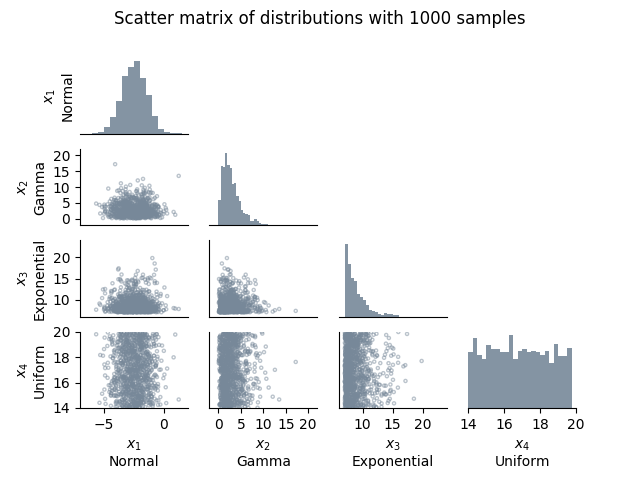

In [4]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=20, save_count = 40)

In [5]:
a.save('Lopez-animation.mp4')

/opt/conda/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)
/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
